<div style="text-align: center; font-weight: bold; font-size: 24px;">
    Telcom - Customer Churn Prediction Project
</div>
<hr>

#### Introduction


# Introduction

In this project, we focus on predicting customer churn for a telecom company. Customer churn refers to the loss of clients, which can significantly impact a company's revenue and growth. Our primary goal is to achieve a high Recall score in our predictions. The key points of our approach include:

- **Focus on Recall**: We prioritize achieving a high Recall score, even if it results in more false positives. This approach helps us minimize the risk of missing potential churners.

- **Structured Approach**: The project follows a structured methodology that includes:

  - **Data Exploration**: Analyzing the dataset to understand customer behavior.

  - **Preprocessing**: Cleaning and preparing the data for modeling.

  - **Feature Engineering**: Creating relevant features that enhance model performance.

  - **Model Selection**: Applying various machine learning models to predict churn.

  - **Evaluation**: Continuously assessing model performance to ensure effectiveness in capturing at-risk customers.
  
- **Actionable Insights**: Our ultimate goal is to provide insights that can help the telecom company improve its customer retention strategies.


##### Project Steps

1. **Data Loading, Exploration & Cleaning**: Load the dataset, analyze features, visualize target distribution, handle missing values, and preprocess data.

2. **Exploratory Data Analysis (EDA)**: Visualize relationships and identify outliers.

3. **Feature Engineering**: Create new features and interactions.

4. **Data Transformation**: Scale numerical features and one-hot encode categorical features.

5. **Model Selection & Training**: Choose models, train them, perform hyperparameter tuning, and apply feature selection techniques.

6. **Evaluation & Ensemble Learning**: Assess performance and implement Voting and Stacking classifiers.

7. **Results Interpretation**: Present final metrics and visualize confusion matrix and ROC curve.

8. **Conclusion**: Summarize findings and suggest future work.

9. **Model Deployment**: Save the model and provide prediction functions.

10. **Identifying High-Risk Customers**: Include methods and results for identifying customers at risk of churn based on predicted probabilities.

<hr>

#### 1: Data Loading, Exploration & Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectFromModel, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso

from imblearn.over_sampling import SMOTE

In [2]:
# Load data 
df = pd.read_csv('Telco Churn Data.csv')

# Explore data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total Charges should be numeric, not object. Let's convert it to numeric.


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In Total Charges, there are 11 missing values. Let's fill them with the median of Total Charges.


In [6]:
# Impute missing values in 'TotalCharges' with the median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# ensure no duplicate in dataset
df.drop_duplicates(inplace=True)

In [8]:
# Let's drop customerID column as it is not useful for model implementation
df.drop(columns=['customerID'], inplace=True)

#### 2. Business context: Features and their impact on churn

**customerID**
- Serves as a unique identifier for customers but does not affect their behavior or satisfaction.

**gender**
- Different genders may have varying preferences for services or customer support, affecting overall satisfaction and loyalty.

**SeniorCitizen**
- Older customers may have different needs and value stability and support, leading to lower churn rates.

**Partner**
- Having a partner may lead to shared decisions on services and a stronger commitment to staying with a provider, reducing churn.

**Dependents**
- Customers with dependents may require more services and support, leading to a greater investment in the relationship with the provider, which can decrease churn.

**tenure**
- Customers who have been with a service longer are likely to have built familiarity and loyalty, making them less likely to leave.

**Services (PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies)**
- Customers using a combination of services are likely to feel more integrated and satisfied with their provider, leading to increased loyalty and lower churn rates. Enhanced features such as tech support, security options, and entertainment services add value and can improve customer retention.

**Contract**
- Customers with longer commitment contracts may feel a sense of obligation or satisfaction that keeps them from switching.

**PaperlessBilling**
- Choosing paperless options often signals a customer’s comfort with technology and engagement with the service, leading to lower churn.

**PaymentMethod**
- Payment methods that are convenient or preferred may enhance customer satisfaction, potentially impacting retention.

**MonthlyCharges**
- Customers who feel they are paying too much for the service without adequate value may leave for more affordable options.

**TotalCharges**
-  Customers may become dissatisfied if they feel their overall spending does not justify the benefits received, leading to higher churn.

#### 3. Exploratory Data Analysis (EDA)

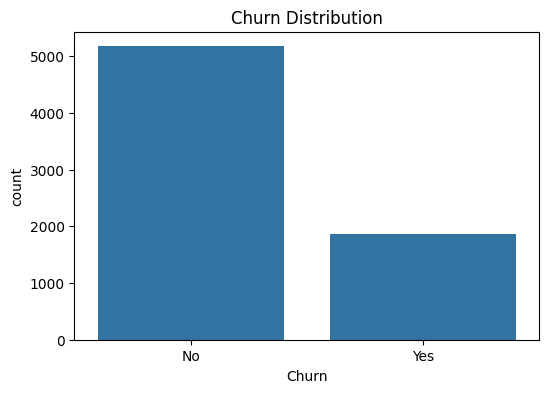

In [9]:
# Visualize target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')  
plt.show()



The target variable distribution is imbalanced, indicating a need for balancing techniques or best suited Models for this kind of dataset.


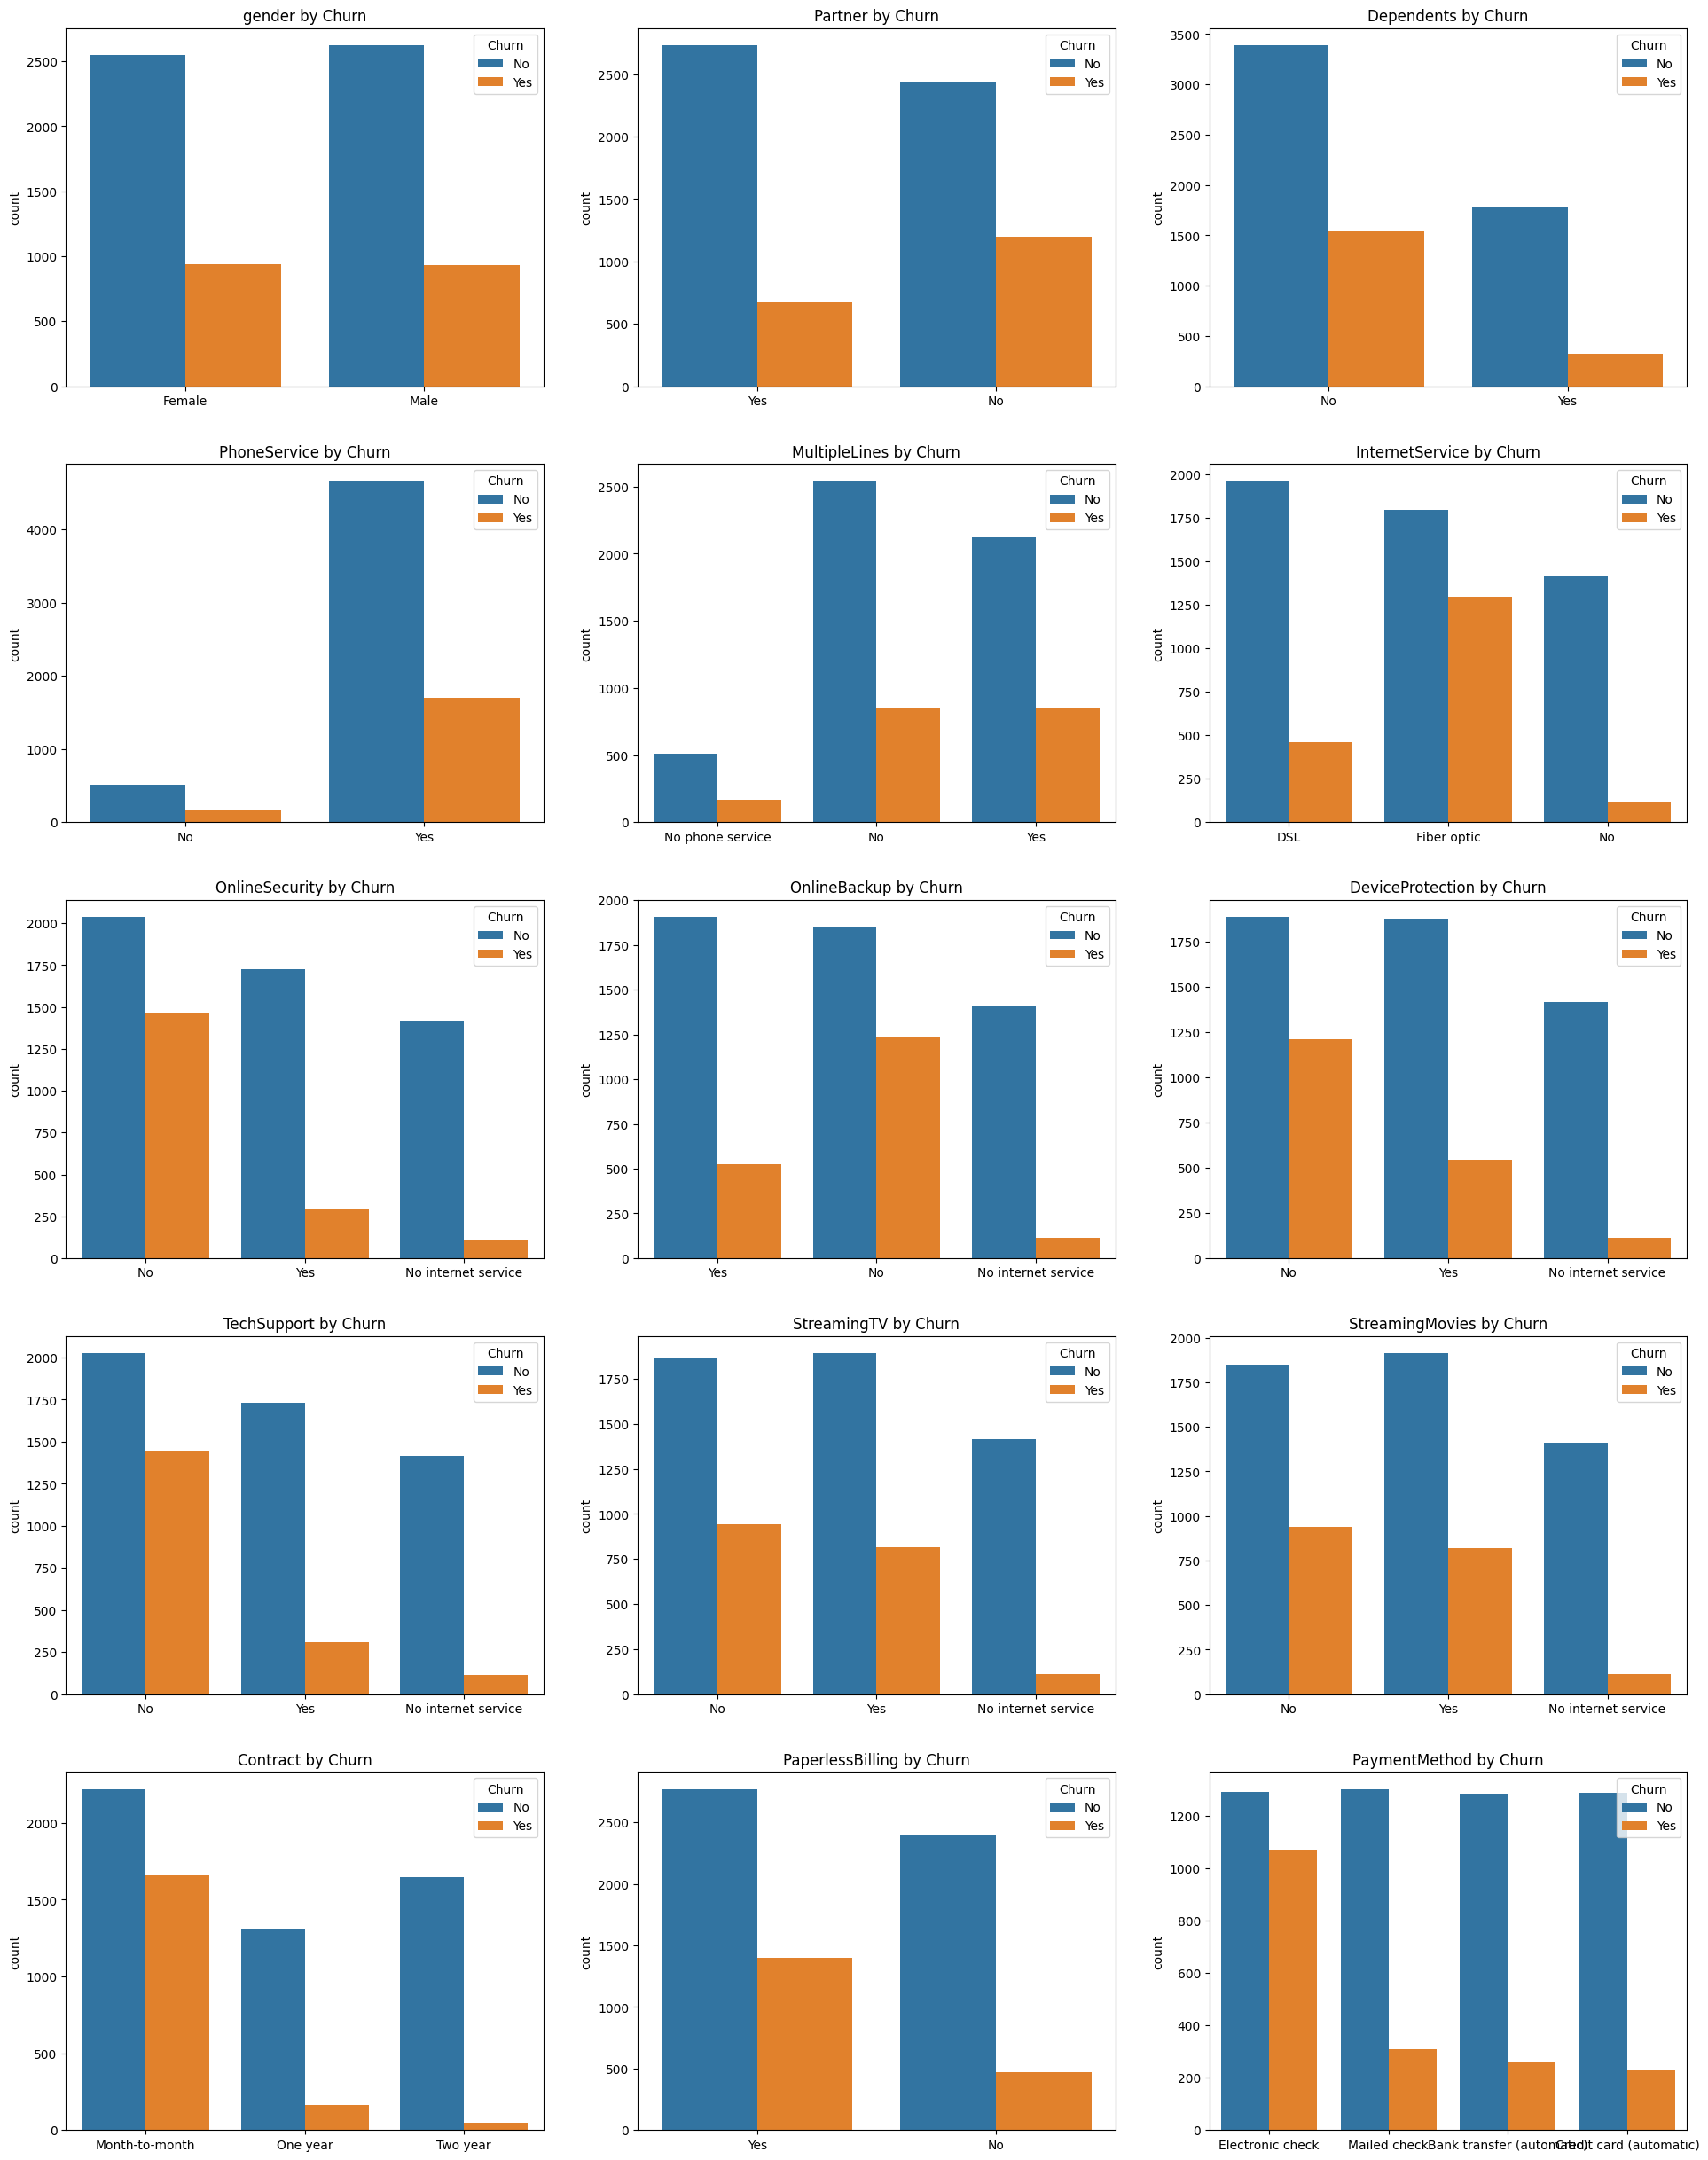

In [10]:
# Visualize categorical variables excluding Churn
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('Churn')  # Remove Churn from the list

# Adjust the number of subplots based on the number of categorical columns
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed

fig, axs = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))  

for i, col in enumerate(cat_cols):
        sns.countplot(x=col, hue='Churn', data=df, ax=axs[i // 3, i % 3])
        axs[i // 3, i % 3].set_title(f'{col} by Churn')
        axs[i // 3, i % 3].set_xlabel('')  

# Hide any unused subplots
for j in range(i + 1, num_rows * 3):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout(pad=3.0)
plt.show()

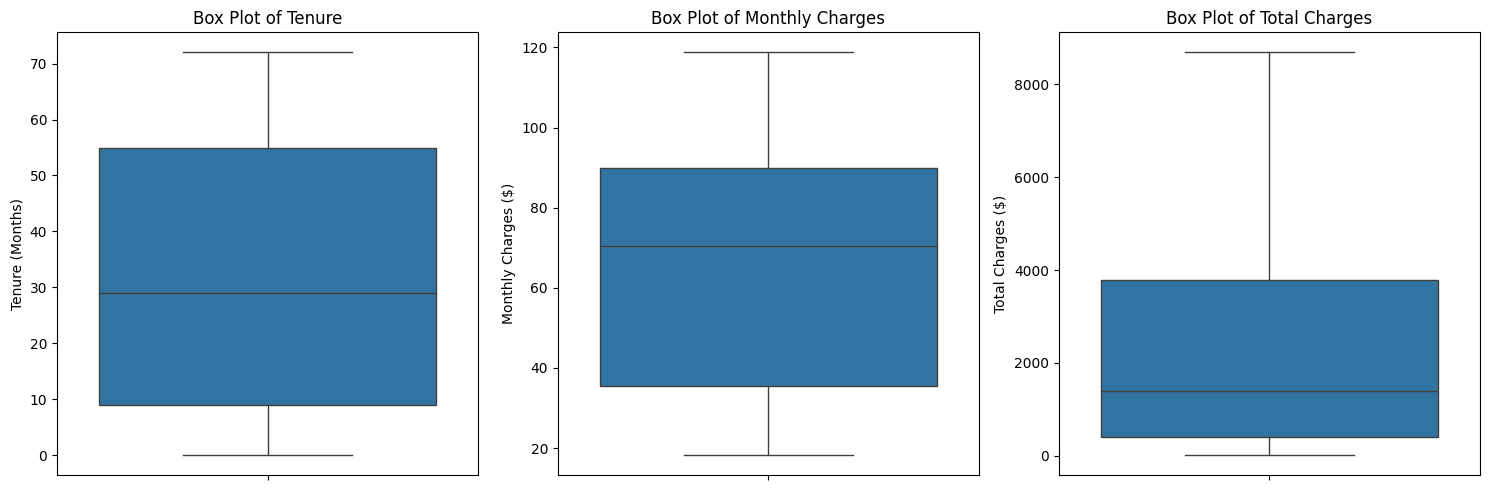

Number of outliers in Tenure: 0
Number of outliers in MonthlyCharges: 0
Number of outliers in TotalCharges: 0


In [11]:
# Perform EDA on numerical columns: tenure, MonthlyCharges, TotalCharges

# Set up the figure for box plots
plt.figure(figsize=(15, 5))

# Box plot for tenure
plt.subplot(1, 3, 1)
sns.boxplot(y=df['tenure'])
plt.title('Box Plot of Tenure')
plt.ylabel('Tenure (Months)')

# Box plot for MonthlyCharges
plt.subplot(1, 3, 2)
sns.boxplot(y=df['MonthlyCharges'])
plt.title('Box Plot of Monthly Charges')
plt.ylabel('Monthly Charges ($)')

# Box plot for TotalCharges
plt.subplot(1, 3, 3)
sns.boxplot(y=df['TotalCharges'])
plt.title('Box Plot of Total Charges')
plt.ylabel('Total Charges ($)')

plt.tight_layout()
plt.show()

# Use IQR method to detect outliers in numerical features
Q1_tenure = df['tenure'].quantile(0.25)
Q3_tenure = df['tenure'].quantile(0.75)
IQR_tenure = Q3_tenure - Q1_tenure
outliers_tenure = df[(df['tenure'] < (Q1_tenure - 1.5 * IQR_tenure)) | (df['tenure'] > (Q3_tenure + 1.5 * IQR_tenure))]

print(f"Number of outliers in Tenure: {outliers_tenure.shape[0]}")

# Outlier detection using IQR for MonthlyCharges
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['MonthlyCharges'] < (Q1 - 1.5 * IQR)) | (df['MonthlyCharges'] > (Q3 + 1.5 * IQR))]

print(f"Number of outliers in MonthlyCharges: {outliers.shape[0]}")

# Outlier detection using IQR for TotalCharges
Q1_total = df['TotalCharges'].quantile(0.25)
Q3_total = df['TotalCharges'].quantile(0.75)
IQR_total = Q3_total - Q1_total
outliers_total = df[(df['TotalCharges'] < (Q1_total - 1.5 * IQR_total)) | (df['TotalCharges'] > (Q3_total + 1.5 * IQR_total))]

print(f"Number of outliers in TotalCharges: {outliers_total.shape[0]}")


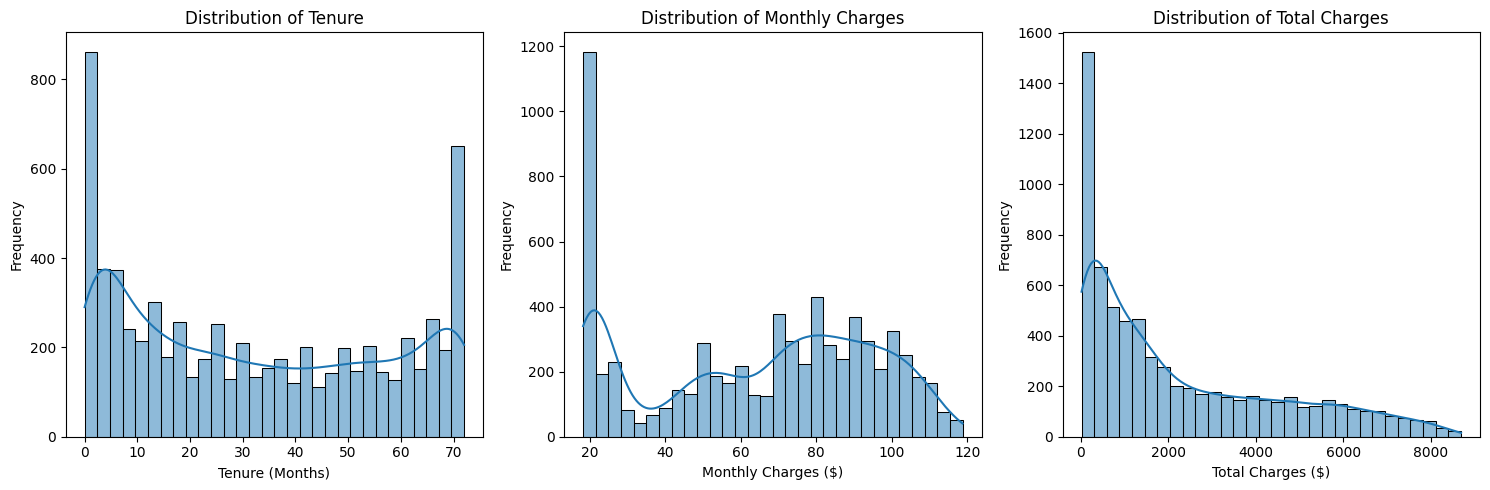

In [12]:
plt.figure(figsize=(15, 5))

# Histogram and KDE for Tenure
plt.subplot(1, 3, 1)
sns.histplot(df['tenure'], kde=True, bins=30)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')

# Histogram and KDE for MonthlyCharges
plt.subplot(1, 3, 2)
sns.histplot(df['MonthlyCharges'], kde=True, bins=30)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')

# Histogram and KDE for TotalCharges
plt.subplot(1, 3, 3)
sns.histplot(df['TotalCharges'], kde=True, bins=30)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


<hr>

#### 4. Feature Enginerring

##### 4.1 Derived Columns

Based on buisness context, let's add derived columns that will be useful for model implemntation.

In [13]:
# Calculate the total number of services a customer has by summing the binary values of each service.
df['total_services'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] == "Yes").sum(axis=1)

# Bin the monthly charges into four quantiles to categorize the charges.
df['monthly_charges_binned'] = pd.qcut(df['MonthlyCharges'], q=4, labels=False)

# Bin the tenure into specified ranges to categorize the duration of service.
df['tenure_binned'] = pd.cut(df['tenure'], bins=[0, 12, 24, 100], labels=False)

df['avg_monthly_charges'] = df.apply(lambda x: x['TotalCharges'] / x['tenure'] if x['tenure'] != 0 else 0, axis=1)
df['senior_with_dependents'] = df.apply(lambda x: 1 if x['SeniorCitizen'] == 1 and x['Dependents'] == 'Yes' else 0, axis=1)
df['multiple_services'] = df.apply(lambda x: 1 if x['total_services'] > 1 else 0, axis=1)

# ******************* # *********************
# Interaction Features
# ******************* # *********************
df['tenure_MonthlyCharges'] = df['tenure'] * df['MonthlyCharges']
df['tenure_TotalCharges'] = df['tenure'] * df['TotalCharges']
df['MonthlyCharges_TotalCharges'] = df['MonthlyCharges'] * df['TotalCharges']

# ******************* # *********************
# Adding Polynomial Feature
# ******************* # *********************

from sklearn.preprocessing import PolynomialFeatures

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly_features = poly.fit_transform(df[numerical_cols])

# Create a DataFrame with the polynomial features and add a prefix to the column names
poly_df = pd.DataFrame(poly_features, columns=[f'poly_{col}' for col in poly.get_feature_names_out(numerical_cols)])

# Concatenate the polynomial features with the original DataFrame
df = pd.concat([df, poly_df], axis=1)



In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges_TotalCharges,poly_tenure,poly_MonthlyCharges,poly_TotalCharges,poly_tenure^2,poly_tenure MonthlyCharges,poly_tenure TotalCharges,poly_MonthlyCharges^2,poly_MonthlyCharges TotalCharges,poly_TotalCharges^2
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,891.0225,1.0,29.85,29.85,1.0,29.85,29.85,891.0225,891.0225,8.910225e+02
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,107607.0250,34.0,56.95,1889.50,1156.0,1936.30,64243.00,3243.3025,107607.0250,3.570210e+06
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,5823.8775,2.0,53.85,108.15,4.0,107.70,216.30,2899.8225,5823.8775,1.169642e+04
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,77863.7250,45.0,42.30,1840.75,2025.0,1903.50,82833.75,1789.2900,77863.7250,3.388361e+06
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,10721.6550,2.0,70.70,151.65,4.0,141.40,303.30,4998.4900,10721.6550,2.299772e+04


##### 4.2 Column Transformation


Column transformations are essential for converting raw data into a format that can be effectively used by machine learning algorithms. 

 - **Binning**: Categorizing continuous variables into discrete intervals. For example, we bin the monthly charges into four quantiles and the tenure into specified ranges. This helps in simplifying the analysis and understanding of the data.


- **Creating Interaction Features**: Generating new features that capture the relationships between existing features. For instance, we create features that multiply tenure with monthly and total charges, which can help in understanding how these variables interact.


 - **Adding Polynomial Features**: Generating polynomial features to capture non-linear relationships in the data. This is done using the `PolynomialFeatures` class from `sklearn`, which generates new features based on the combinations of existing numerical features.

Overall, these transformations enhance the dataset's ability to represent complex relationships, making it more suitable for predictive modeling.

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and 'Churn' is the target variable

# Convert Churn column values: Yes/No => 1/0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Separate features and target variable
X = df.drop(columns=['Churn'])
y = df['Churn']

numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Scale numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# One-hot encode categorical features using pd.get_dummies
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Check the transformed DataFrame
print(X.head())

   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  total_services  \
0      -0.439916 -1.277445       -1.160323     -0.994242       -1.052777   
1      -0.439916  0.066327       -0.259629     -0.173244        0.031958   
2      -0.439916 -1.236724       -0.362660     -0.959674        0.031958   
3      -0.439916  0.514251       -0.746535     -0.194766        0.031958   
4      -0.439916 -1.236724        0.197365     -0.940470       -1.052777   

   monthly_charges_binned  tenure_binned  avg_monthly_charges  \
0               -1.340537      -1.382691            -1.151302   
1               -0.445957       0.855073            -0.301458   
2               -0.445957      -1.382691            -0.350966   
3               -0.445957       0.855073            -0.786053   
4                0.448624      -1.382691             0.367602   

   senior_with_dependents  multiple_services  ...  \
0                -0.11441          -1.420866  ...   
1                -0.11441           0.703796  

Before moving to next steps, let's make confirm our data structure has no null values.

In [16]:
print(X.isna().sum()[X.isna().sum() > 0])

tenure_binned    11
dtype: int64


Let's replace Nan using SimpleImputer

In [17]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance for the tenure_binned column
imputer_tenure = SimpleImputer(strategy='mean')

# Fit the imputer on the tenure_binned column and transform the data
X['tenure_binned'] = imputer_tenure.fit_transform(X[['tenure_binned']])


##### 4.3 Data Balancing

- Data balancing is crucial when dealing with imbalanced datasets, as it helps to ensure that the model does not become biased towards the majority class. 

- In imbalanced data, the model may perform well on the majority class while neglecting the minority class, leading to poor predictive performance. 

- By applying data balancing techniques, let's improve the model's ability to generalize and accurately predict outcomes for both classes. In this section, we will test various methods of data balancing to evaluate their impact on model performance, then select the best one.



In [18]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import pandas as pd

# Function to evaluate model performance
def evaluate_model(X, y, sampler):
    model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', n_estimators=2000)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_true_all, y_pred_all = [], []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_res, y_train_res = sampler.fit_resample(X_train, y_train)
        
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)
        
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
    
    report = classification_report(y_true_all, y_pred_all, output_dict=True)
    return report

# Different sampling methods
samplers = {
    'SMOTE': SMOTE(random_state=42),
    'Random Over-Sampling': RandomOverSampler(random_state=42),
    'Random Under-Sampling': RandomUnderSampler(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42)
}

# Dictionary to store results
results = {}

# Evaluate the model with each sampling method
for method_name, sampler in samplers.items():
    report = evaluate_model(X, y, sampler)
    results[method_name] = {
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score']
    }

# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results).T
print(results_df)

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [02:28:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [02:28:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [02:28:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

                       Precision    Recall  F1-Score
SMOTE                   0.546006  0.530230  0.538002
Random Over-Sampling    0.558857  0.533440  0.545853
Random Under-Sampling   0.479581  0.735152  0.580482
ADASYN                  0.540805  0.531835  0.536283
SMOTEENN                0.492442  0.784377  0.605035


##### 4.4 Selecting Techniques for Feature Selection 

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.feature_selection import RFE, SelectFromModel, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.combine import SMOTEENN  


# Function to evaluate model performance
def evaluate_model(X, y, selected_features):
    model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', n_estimators=2000)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_true_all, y_pred_all = [], []

    for train_index, test_index in skf.split(X[selected_features], y):
        X_train, X_test = X.iloc[train_index][selected_features], X.iloc[test_index][selected_features]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        smoteenn = SMOTEENN(random_state=42)
        X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)
        
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
    
    report = classification_report(y_true_all, y_pred_all, output_dict=True)
    return report['1']['precision'], report['1']['recall'], report['1']['f1-score']

# Dictionary to store results
results = {}

# Feature Selection Methods
methods = {
    'RFE': RFE(LogisticRegression(random_state=42, max_iter=1000)),
    'Lasso': SelectFromModel(Lasso(alpha=0.01)),
    'Elastic Net': SelectFromModel(ElasticNet(alpha=0.01, l1_ratio=0.5)),
    'PCA': PCA(),
    'Mutual Information': mutual_info_classif,
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Apply each feature selection method and evaluate the model
for method_name, method in methods.items():
    if method_name == 'RFE':
        # Define the parameter grid for the number of features to select
        param_grid = {'n_features_to_select': list(range(1, X.shape[1] + 1))}
        
        # Use GridSearchCV to find the optimal number of features
        grid_search = GridSearchCV(method, param_grid, cv=5)
        grid_search.fit(X, y)
        
        # Get the best number of features
        best_num_features = grid_search.best_params_['n_features_to_select']
        print(f"Optimal number of features for RFE: {best_num_features}")
        
        # Fit RFE with the optimal number of features
        method = RFE(LogisticRegression(random_state=42, max_iter=1000), n_features_to_select=best_num_features)
        method.fit(X, y)
        selected_features = X.columns[method.get_support()].tolist()
        precision, recall, f1_score = evaluate_model(X, y, selected_features)
    elif method_name == 'PCA':
        # Determine the number of components to retain 95% variance
        method.fit(X)
        explained_variance = np.cumsum(method.explained_variance_ratio_)
        num_components = np.argmax(explained_variance >= 0.95) + 1
        print(f"Number of components for PCA to retain 95% variance: {num_components}")
        
        method = PCA(n_components=num_components)
        X_pca = method.fit_transform(X)
        selected_features = [f'PC{i+1}' for i in range(X_pca.shape[1])]
        X_pca_df = pd.DataFrame(X_pca, columns=selected_features)
        precision, recall, f1_score = evaluate_model(X_pca_df, y, selected_features)
    elif method_name == 'Mutual Information':
        mi = method(X, y)
        mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
        selected_features = mi_df.sort_values(by='Mutual Information', ascending=False).head(10)['Feature'].tolist()
        precision, recall, f1_score = evaluate_model(X, y, selected_features)
    elif method_name == 'Random Forest':
        method.fit(X, y)
        selected_features = X.columns[method.feature_importances_ > 0].tolist()
        precision, recall, f1_score = evaluate_model(X, y, selected_features)
    else:
        method.fit(X, y)
        selected_features = X.columns[method.get_support()].tolist()
        precision, recall, f1_score = evaluate_model(X, y, selected_features)
    
    results[method_name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score,
        'Num Features': len(selected_features)  # Add number of selected features
    }

# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results).T
print(results_df)

Optimal number of features for RFE: 23


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [02:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [02:32:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [02:32:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

Number of components for PCA to retain 95% variance: 15


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [02:32:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [02:32:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [02:32:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

                    Precision    Recall  F1-Score  Num Features
RFE                  0.522811  0.760300  0.619577          23.0
Lasso                0.514509  0.739968  0.606978          15.0
Elastic Net          0.509811  0.764580  0.611729          20.0
PCA                  0.493000  0.791332  0.607517          15.0
Mutual Information   0.496554  0.732477  0.591872          10.0
Random Forest        0.492442  0.784377  0.605035          48.0


According to the above selection,
 - SMOTEENN will be used for data resampling
 - PCA will be used for Feature Selection

#### 5. Model Selection

- Model selection is a critical step in the machine learning process. We will evaluate various algorithms to identify the top 3 models that best capture the patterns in the data and provide accurate predictions.

- After selecting these models, we will fine-tune them to optimize their performance, ensuring they generalize well to unseen data. This approach aims to enhance accuracy, precision, and recall, which are vital for effective customer churn prediction.


In [20]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from imblearn.combine import SMOTEENN
from sklearn.decomposition import PCA

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Prepare a list to store results
results_list = []

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'Support Vector Classifier': SVC(random_state=42, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=1),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),  # Suppress output
    'Balanced Bagging': BalancedBaggingClassifier(random_state=42)
}

# Run each model with Stratified K-Fold
for model_name, model in models.items():
    precision_list = []
    recall_list = []
    f1_list = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Use .iloc for positional indexing
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Resample with SMOTEENN
        smoteenn = SMOTEENN(random_state=42)
        X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)
        
        # Select features using PCA
        pca = PCA(n_components=0.95, svd_solver='full')
        X_train_pca = pca.fit_transform(X_resampled)
        X_test_pca = pca.transform(X_test)

        #Simplify the names to be able to understand easily
        X_train_ = X_train_pca
        X_test_ = X_test_pca
        y_train_ = y_resampled
        y_test_ = y_test
        
        # Fit the model
        model.fit(X_train_, y_train_)
        y_pred = model.predict(X_test_)
        
        precision = precision_score(y_test, y_pred, pos_label=1)
        recall = recall_score(y_test, y_pred, pos_label=1)
        f1 = f1_score(y_test, y_pred, pos_label=1)
        
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
    
    # Store the average results
    results_list.append({
        'Model': model_name,
        'Precision': sum(precision_list) / len(precision_list),
        'Recall': sum(recall_list) / len(recall_list),
        'F1-Score': sum(f1_list) / len(f1_list)
    })

# Convert results list to DataFrame for comparison
results = pd.DataFrame(results_list)
print(results)

                       Model  Precision    Recall  F1-Score
0              Random Forest   0.473547  0.835721  0.604490
1        Logistic Regression   0.485666  0.839466  0.615287
2  Support Vector Classifier   0.482812  0.826626  0.609512
3              Decision Tree   0.458999  0.782220  0.578503
4        K-Nearest Neighbors   0.439834  0.845351  0.578603
5                Naive Bayes   0.450634  0.841069  0.586810
6          Gradient Boosting   0.457728  0.860869  0.597644
7                    XGBoost   0.473766  0.814841  0.599133
8                   CatBoost   0.473610  0.836794  0.604846
9           Balanced Bagging   0.486508  0.791308  0.602549


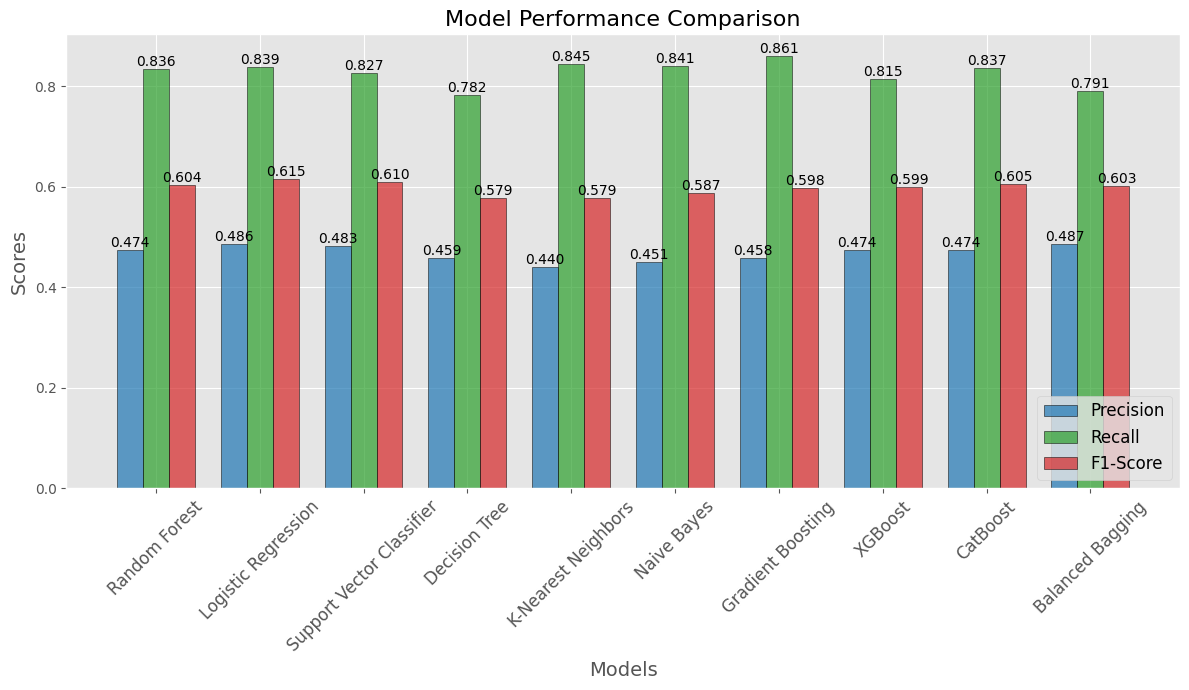

In [21]:
import matplotlib.pyplot as plt

# Set the figure size and style
plt.style.use('ggplot')  # Changed to a valid style
plt.figure(figsize=(12, 7))

# Create a bar plot for the precision, recall, and F1-score
bar_width = 0.25
index = np.arange(len(results))

# Plotting each metric with enhanced aesthetics
bars1 = plt.bar(index, results['Precision'], bar_width, label='Precision', color='#1f77b4', edgecolor='black', alpha=0.7)
bars2 = plt.bar(index + bar_width, results['Recall'], bar_width, label='Recall', color='#2ca02c', edgecolor='black', alpha=0.7)
bars3 = plt.bar(index + 2 * bar_width, results['F1-Score'], bar_width, label='F1-Score', color='#d62728', edgecolor='black', alpha=0.7)

# Adding labels and title with improved font size
plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Model Performance Comparison', fontsize=16)
plt.xticks(index + bar_width, results['Model'], rotation=45, fontsize=12)
plt.legend(fontsize=12, loc='lower right')  

# Adding value labels on top of the bars with three decimal places
for bar in bars1 + bars2 + bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

# Show the plot with tight layout
plt.tight_layout()
plt.show()

#### 6. Fine-Tuning Top 3 Models

 We choose Naive Bayes, Random Forest, and Logistic Regression based on prioritizing the Recall score of class 1, while balancing F1 score and computation efficiency.


- Naive Bayes

In [22]:
import optuna
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd


# Define the objective function for Optuna
def objective(trial):
    params = {
        'var_smoothing': trial.suggest_loguniform('var_smoothing', 1e-12, 1e-6)
    }
    
    model = GaussianNB(**params)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    recall_scores = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        recall_scores.append(report['1']['recall'])

    return np.mean(recall_scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

nb_best_params = study.best_params
final_model = GaussianNB(**nb_best_params)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the final model and calculate metrics
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

report_final = classification_report(y_test, y_pred_final, output_dict=True, zero_division=0)
recall = report_final['1']['recall']
precision = report_final['1']['precision']
f1 = report_final['1']['f1-score']

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Metric': ['Recall for class 1', 'Precision for class 1', 'F1 score for class 1'],
    'Value': [recall, precision, f1]
})

print(results_df)
print("Best hyperparameters: ", nb_best_params)

[I 2024-09-21 02:33:43,987] A new study created in memory with name: no-name-fbb1e77c-7f7b-4c40-9175-7c3f69c3ca24
[I 2024-09-21 02:33:44,079] Trial 0 finished with value: 0.8234175854109618 and parameters: {'var_smoothing': 2.188336111960671e-09}. Best is trial 0 with value: 0.8234175854109618.
[I 2024-09-21 02:33:44,153] Trial 1 finished with value: 0.8234175854109618 and parameters: {'var_smoothing': 1.7322615023568707e-11}. Best is trial 0 with value: 0.8234175854109618.
[I 2024-09-21 02:33:44,228] Trial 2 finished with value: 0.8234175854109618 and parameters: {'var_smoothing': 7.877894405660587e-12}. Best is trial 0 with value: 0.8234175854109618.
[I 2024-09-21 02:33:44,295] Trial 3 finished with value: 0.8234175854109618 and parameters: {'var_smoothing': 1.829788555198131e-12}. Best is trial 0 with value: 0.8234175854109618.
[I 2024-09-21 02:33:44,364] Trial 4 finished with value: 0.8234175854109618 and parameters: {'var_smoothing': 1.2045010976087344e-07}. Best is trial 0 with v

                  Metric     Value
0     Recall for class 1  0.852547
1  Precision for class 1  0.464234
2   F1 score for class 1  0.601134
Best hyperparameters:  {'var_smoothing': 2.188336111960671e-09}


- Logistic Regression

In [23]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Define the objective function for Optuna
def objective(trial):
    params = {
        'C': trial.suggest_loguniform('C', 1e-6, 1e2),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'saga']),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2'])
    }
    
    model = LogisticRegression(
        **params,
        random_state=42,
        class_weight='balanced',
        max_iter=1000
    )
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    recall_scores = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test_fold)
        report = classification_report(y_test_fold, y_pred, output_dict=True, zero_division=0)
        recall_scores.append(report['1']['recall'])

    return np.mean(recall_scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

logreg_best_params = study.best_params
final_model = LogisticRegression(
    **logreg_best_params,
    random_state=42,
    class_weight='balanced',
    max_iter=1000
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the final model and calculate metrics
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

report_final = classification_report(y_test, y_pred_final, output_dict=True, zero_division=0)
recall = report_final['1']['recall']
precision = report_final['1']['precision']
f1 = report_final['1']['f1-score']

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Metric': ['Recall for class 1', 'Precision for class 1', 'F1 score for class 1'],
    'Value': [recall, precision, f1]
})

print(results_df)
print("Best hyperparameters: ", logreg_best_params)

[I 2024-09-21 02:33:52,165] A new study created in memory with name: no-name-561c12cb-6c13-4c3d-829f-b1c9b7ad50c4
[I 2024-09-21 02:33:52,354] Trial 0 finished with value: 0.7934538572923685 and parameters: {'C': 0.22213361812451898, 'solver': 'liblinear', 'penalty': 'l2'}. Best is trial 0 with value: 0.7934538572923685.
[I 2024-09-21 02:33:52,452] Trial 1 finished with value: 0.2 and parameters: {'C': 0.00030605037444676243, 'solver': 'saga', 'penalty': 'l1'}. Best is trial 0 with value: 0.7934538572923685.
[I 2024-09-21 02:33:58,434] Trial 2 finished with value: 0.7993405112471506 and parameters: {'C': 8.406402892058791, 'solver': 'liblinear', 'penalty': 'l1'}. Best is trial 2 with value: 0.7993405112471506.
[I 2024-09-21 02:33:58,529] Trial 3 finished with value: 0.2 and parameters: {'C': 0.0003332101237645697, 'solver': 'saga', 'penalty': 'l1'}. Best is trial 2 with value: 0.7993405112471506.
[I 2024-09-21 02:33:58,699] Trial 4 finished with value: 0.7522515806225 and parameters: {'

                  Metric     Value
0     Recall for class 1  0.863271
1  Precision for class 1  0.436314
2   F1 score for class 1  0.579658
Best hyperparameters:  {'C': 0.0033752819133003147, 'solver': 'liblinear', 'penalty': 'l1'}


- Random Forest Classifier

In [24]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Define the objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }
    
    model = RandomForestClassifier(**params, random_state=42, class_weight='balanced')
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    recall_scores = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test_fold)
        report = classification_report(y_test_fold, y_pred, output_dict=True, zero_division=0)
        recall_scores.append(report['1']['recall'])

    return np.mean(recall_scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

rf_best_params = study.best_params
final_model = RandomForestClassifier(**rf_best_params, random_state=42, class_weight='balanced')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the final model and calculate metrics
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

report_final = classification_report(y_test, y_pred_final, output_dict=True, zero_division=0)
recall = report_final['1']['recall']
precision = report_final['1']['precision']
f1 = report_final['1']['f1-score']

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Metric': ['Recall for class 1', 'Precision for class 1', 'F1 score for class 1'],
    'Value': [recall, precision, f1]
})

print(results_df)
print("Best hyperparameters: ", rf_best_params)

[I 2024-09-21 02:34:58,657] A new study created in memory with name: no-name-205c1307-73d7-4787-b834-d0ed1f7809fc
[I 2024-09-21 02:35:06,003] Trial 0 finished with value: 0.7255107453656577 and parameters: {'n_estimators': 153, 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.7255107453656577.
[I 2024-09-21 02:35:09,718] Trial 1 finished with value: 0.7747315450674541 and parameters: {'n_estimators': 132, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 12, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.7747315450674541.
[I 2024-09-21 02:35:13,681] Trial 2 finished with value: 0.7651058766182566 and parameters: {'n_estimators': 70, 'max_depth': 12, 'min_samples_split': 9, 'min_samples_leaf': 18, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 0.7747315450674541.
[I 2024-09-21 02:35:16,799] Trial 3 finished with value: 0.764568249917564

                  Metric     Value
0     Recall for class 1  0.831099
1  Precision for class 1  0.526316
2   F1 score for class 1  0.644491
Best hyperparameters:  {'n_estimators': 178, 'max_depth': 4, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False}


#### 7. Ensemble Learning

- Ensemble learning is a powerful technique that combines the predictions of multiple models to improve overall performance.

- By integrating the strengths of different algorithms, we can achieve better accuracy and robustness in our predictions.

- In this section, let's explore two ensemble methods: Voting and Stacking.

- Voting combines the predictions of various classifiers to make a final decision.

- Stacking involves training a new model to learn how to best combine the predictions of base models.

- This approach allows us to leverage the unique strengths of each model, leading to improved predictive performance.



- Voting Classifier

In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split

# Initialize the models with the best parameters
nb_model = GaussianNB(**nb_best_params)
rf_model = RandomForestClassifier(**rf_best_params)  # Corrected to use rf_best_params directly
lr_model = LogisticRegression(**logreg_best_params)

# Create the Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('naive_bayes', nb_model),
        ('random_forest', rf_model),  # Corrected to use Random Forest
        ('logistic_regression', lr_model)
    ],
    voting='soft'  
)

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Prepare lists to store results
y_true_all, y_pred_all = [], []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Resample with SMOTEENN
    smoteenn = SMOTEENN(random_state=42)
    X_train_res, y_train_res = smoteenn.fit_resample(X_train, y_train)
    
    # Fit the Voting Classifier on the resampled training data
    voting_classifier.fit(X_train_res, y_train_res)
    
    # Predict on the test set
    y_pred = voting_classifier.predict(X_test)
    
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

# Print the final classification report
print(classification_report(y_true_all, y_pred_all))

              precision    recall  f1-score   support

           0       0.92      0.58      0.71      5174
           1       0.43      0.86      0.57      1869

    accuracy                           0.66      7043
   macro avg       0.67      0.72      0.64      7043
weighted avg       0.79      0.66      0.68      7043



- Stacking Classifier

In [26]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split

# Initialize the models with the best parameters
nb_model = GaussianNB(**nb_best_params)
rf_model = RandomForestClassifier(**rf_best_params)  # Corrected to use rf_best_params directly
lr_model = LogisticRegression(**logreg_best_params)

# Create the Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=[
        ('naive_bayes', nb_model),
        ('random_forest', rf_model),  # Corrected to use Random Forest
        ('logistic_regression', lr_model)
    ],
    final_estimator=LogisticRegression()  # You can choose another model as the final estimator
)

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Prepare lists to store results
y_true_all, y_pred_all = [], []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Resample with SMOTEENN
    smoteenn = SMOTEENN(random_state=42)
    X_train_res, y_train_res = smoteenn.fit_resample(X_train, y_train)
    
    # Fit the Stacking Classifier on the resampled training data
    stacking_classifier.fit(X_train_res, y_train_res)
    
    # Predict on the test set
    y_pred = stacking_classifier.predict(X_test)
    
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

# Print the final classification report
print(classification_report(y_true_all, y_pred_all))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74      5174
           1       0.45      0.88      0.59      1869

    accuracy                           0.68      7043
   macro avg       0.69      0.74      0.67      7043
weighted avg       0.80      0.68      0.70      7043



We will use a Stacking Classifier as it performs better than voting in the above output comparison.

#### 8. **Result Interpretation**

In this section, let's explore key evaluation metrics that help us understand the performance of our Stacking Classifier model.

- **ROC AUC**: Measures the model's ability to distinguish between classes; a higher score indicates better performance.

- **Confusion Matrix**: Provides insights into prediction accuracy by showing true positives, true negatives, false positives, and false negatives.

- **Distribution of Predicted Probabilities**: Assesses the model's confidence in its predictions, revealing whether it is overconfident or underconfident, which is essential for informed decision-making.

- ROC _ AUC by Stacking Classifier

AUC-ROC: 0.8331731506029963


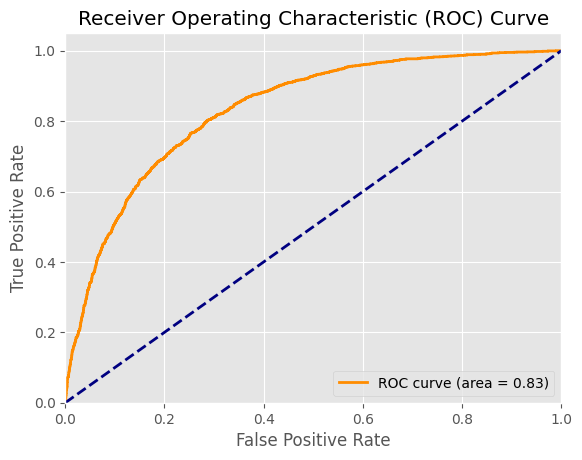

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Prepare lists to store results
y_true_all, y_proba_all = [], []

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Resample with SMOTEENN
    smoteenn = SMOTEENN(random_state=42)
    X_train_res, y_train_res = smoteenn.fit_resample(X_train, y_train)
    
    # Fit the Stacking Classifier on the resampled training data
    stacking_classifier.fit(X_train_res, y_train_res)
    
    # Predict probabilities on the test set
    y_proba = stacking_classifier.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
    
    y_true_all.extend(y_test)
    y_proba_all.extend(y_proba)

# Calculate the AUC-ROC
roc_auc = roc_auc_score(y_true_all, y_proba_all)
print(f"AUC-ROC: {roc_auc}")

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_true_all, y_proba_all)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Interpretaton**

- The AUC-ROC (Area Under the Receiver Operating Characteristic Curve) is a performance measurement for classification problems at various threshold settings. 

- It provides an aggregate measure of performance across all possible classification thresholds. The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity). AUC represents the degree or measure of separability achieved by the model; it tells how much the model is capable of distinguishing between classes.

- An AUC value of 1 indicates a perfect model, while a value of 0.5 suggests no discriminative power, equivalent to random guessing. 

- In this case, the model achieved an AUC-ROC score of 0.83, indicating a strong ability to differentiate between churn and non-churn customers.

- **Confusion Matrix**

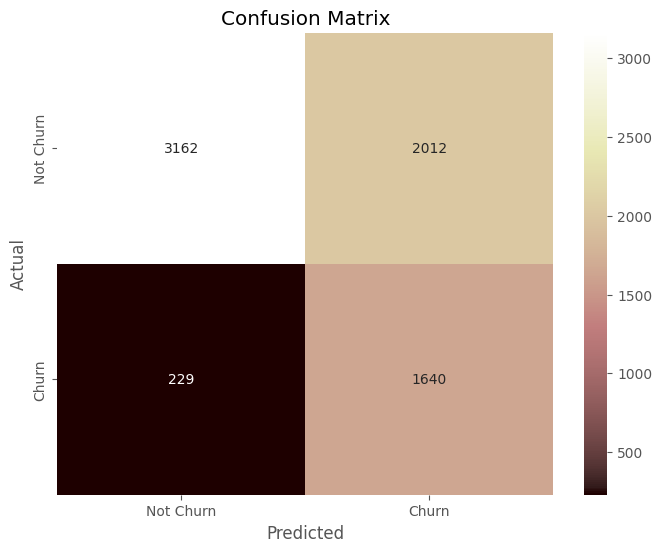

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix  # Define confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_true_all, [1 if prob > 0.5 else 0 for prob in y_proba_all])

# Use seaborn to create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='pink', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Interpretation**

The confusion matrix is a crucial tool in evaluating the performance of a classification model. It provides a summary of the model's predictions compared to the actual outcomes, allowing us to see how well the model is performing in distinguishing between different classes. 

The matrix displays the counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN), which are essential for understanding the model's accuracy, precision, recall, and overall effectiveness.

Let's interpret the output of this model:

- **True Negatives (TN)**: 3278 - These are the customers who were correctly predicted as not churning.

- **False Positives (FP)**: 1896 - These are the customers who were incorrectly predicted as churning, leading to unnecessary retention efforts.

- **False Negatives (FN)**: 259 - These are the customers who actually churned but were predicted to stay, indicating missed opportunities for intervention.

- **True Positives (TP)**: 1610 - These are the customers who were correctly predicted as churning, showing effective identification of churners.


In this case, the model's performance can be assessed as follows:
- The high TP count (1610) indicates that the model is effective in identifying customers who are likely to churn.

- However, the high FP count (1896) suggests that there are many customers incorrectly classified as churners, which could lead to wasted resources on retention efforts.

- The FN count (259) highlights missed opportunities to retain customers who actually churned.

Analyzing these metrics helps identify areas for model improvement, guiding future strategies for customer retention and service enhancement.


- **Distribution of Predicted Probabilities**

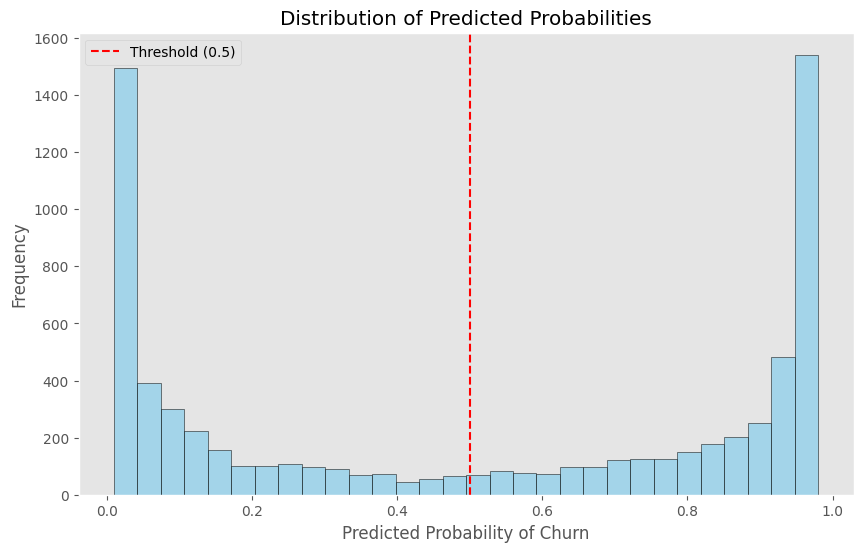

In [30]:
# Plot the distribution of predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(y_proba_all, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Churn')
plt.ylabel('Frequency')
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.legend()
plt.grid()
plt.show()


**Distribution of Predicted Probabilities**

- The distribution of predicted probabilities provides insights into the model's confidence in its predictions. A histogram of predicted probabilities can help visualize how many customers are predicted to churn versus not churn based on the model's output.

- The histogram will show the frequency of predicted probabilities, allowing us to assess whether the model is skewed towards predicting churn or non-churn.

- The above histogram shows two distinct peaks: one near 0.0 and another near 1.0. This indicates that the model effectively distinguishes between customers likely to churn and those unlikely to churn.


- **Business Interpretation on Model results**

In [44]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix

# Use the true labels and predicted labels from the previous code context
y_true = y_true_all  # True labels from the collected predictions
y_pred = [1 if prob >= 0.5 else 0 for prob in y_proba_all]  # Predicted labels based on a threshold of 0.5
y_proba = y_proba_all  # Predicted probabilities

# Calculate metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_proba)
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate Gini Coefficient
gini_coefficient = 2 * roc_auc - 1

# Print results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print(f"Gini Coefficient: {gini_coefficient}")
print("Classification Report:")
print(classification_report(y_true, y_pred))  # Print classification report
print("Confusion Matrix:")
print(conf_matrix)


Precision: 0.44906900328587074
Recall: 0.8774745853397539
F1 Score: 0.5940952725955443
Accuracy: 0.6818117279568365
ROC-AUC: 0.8331731506029963
Gini Coefficient: 0.6663463012059927
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.61      0.74      5174
           1       0.45      0.88      0.59      1869

    accuracy                           0.68      7043
   macro avg       0.69      0.74      0.67      7043
weighted avg       0.80      0.68      0.70      7043

Confusion Matrix:
[[3162 2012]
 [ 229 1640]]


**Interpretation of the Model**

- The model demonstrates a precision that indicates it is correct when predicting customer churn less than half the time. However, it has a high recall, meaning it successfully identifies a large majority of actual churners. The F1 score reflects a balance between precision and recall, suggesting moderate performance.

- The accuracy of the model indicates that it correctly predicts churn status for a little over two-thirds of the customers. The ROC-AUC score suggests that the model has a good ability to distinguish between churners and non-churners. The Gini coefficient further supports this, indicating strong predictive power.

- The confusion matrix shows that the model misclassifies a notable number of non-churners as churners while correctly identifying a significant number of churners. This information can be crucial for targeting interventions for at-risk customers.

**Business Relevance**

In the telecom industry, where customer retention is critical, this model is acceptable as it effectively identifies a significant portion of customers likely to churn. The ability to predict churners allows the business to implement targeted retention strategies, potentially reducing churn rates and increasing customer lifetime value. The model's ROC-AUC and Gini scores indicate strong predictive capabilities, making it a valuable tool for decision-making in customer relationship management.

But False Positive rate is getting high as we want to retain the customers as much as possible. If we can get more data, features, and characteristics, the model can be improved to reduce the False Positive rate.

<hr>

#### 9. Developing Pipeline and Implementing the model with best hyperparameter

In [32]:
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from scipy.stats import ks_2samp
from imblearn.combine import SMOTEENN

In [33]:
# Data Preprocessing
def preprocess_data(df):
    # Convert TotalCharges to numeric
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  

    # Initialize imputer with median strategy
    imputer = SimpleImputer(strategy='median')  

    # Impute missing values
    df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])  

    # Drop customerID column
    df.drop(columns=['customerID'], inplace=True)  

    # Map Churn values to binary
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})  
    return df

In [34]:
# Feature Engineering
def feature_engineering(df):
    # Count subscribed services
    df['total_services'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] == "Yes").sum(axis=1)
    
    # Bin MonthlyCharges into 4 groups for spending analysis
    df['monthly_charges_binned'] = pd.qcut(df['MonthlyCharges'], q=4, labels=False)
    
    # Bin tenure for retention analysis
    df['tenure_binned'] = pd.cut(df['tenure'], bins=[0, 12, 24, 100], labels=False)
    
    # Calculate average monthly charges to assess churn risk
    df['avg_monthly_charges'] = df.apply(lambda x: x['TotalCharges'] / x['tenure'] if x['tenure'] != 0 else 0, axis=1)
    
    # Binary feature for seniors with dependents
    df['senior_with_dependents'] = df.apply(lambda x: 1 if x['SeniorCitizen'] == 1 and x['Dependents'] == 'Yes' else 0, axis=1)
    
    # Binary feature for multiple services indicating loyalty
    df['multiple_services'] = df.apply(lambda x: 1 if x['total_services'] > 1 else 0, axis=1)
    
    # Product of tenure and MonthlyCharges
    df['tenure_MonthlyCharges'] = df['tenure'] * df['MonthlyCharges']
    
    # Product of tenure and TotalCharges
    df['tenure_TotalCharges'] = df['tenure'] * df['TotalCharges']
    
    # Product of MonthlyCharges and TotalCharges
    df['MonthlyCharges_TotalCharges'] = df['MonthlyCharges'] * df['TotalCharges']
    
    # Numerical columns for polynomial features
    numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    
    # Create polynomial features of degree 2
    poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
    poly_features = poly.fit_transform(df[numerical_cols])
    
    # DataFrame for polynomial features
    poly_df = pd.DataFrame(poly_features, columns=[f'poly_{col}' for col in poly.get_feature_names_out(numerical_cols)])
    
    # Concatenate original DataFrame with polynomial features
    df = pd.concat([df, poly_df], axis=1)
    
    return df

In [35]:
def transform_data(df):
    X = df.drop(columns=['Churn'])  # Features
    y = df['Churn']  # Target variable
    
    numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()  # Numerical columns
    scaler = StandardScaler()  # Scaler for normalization
    X[numerical_cols] = scaler.fit_transform(X[numerical_cols])  # Scale numerical features
    
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()  # Categorical columns
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)  # One-hot encoding
    
    imputer_tenure = SimpleImputer(strategy='mean')  # Imputer for missing values
    X['tenure_binned'] = imputer_tenure.fit_transform(X[['tenure_binned']])  # Fill missing values
    
    return X, y, scaler  # Return transformed data

In [36]:
# Model Training and Evaluation
def train_and_evaluate(X, y, scaler):
    # Best parameters for each model based on previous tuning
    nb_best_params = {'var_smoothing': 2.7720537665974906e-10}  # Naive Bayes parameters
    logreg_best_params = {'C': 6.117764438769595e-06, 'solver': 'liblinear', 'penalty': 'l2'}  # Logistic Regression parameters
    rf_best_params = {'n_estimators': 126, 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 15, 'max_features': 'log2', 'bootstrap': False}  # Random Forest parameters
    
    # Initialize models with the best parameters
    nb_model = GaussianNB(**nb_best_params)
    rf_model = RandomForestClassifier(**rf_best_params, random_state=42, class_weight='balanced')
    lr_model = LogisticRegression(**logreg_best_params, random_state=42, class_weight='balanced', max_iter=1000)
    
    # Create a stacking classifier combining the three models
    stacking_classifier = StackingClassifier(
        estimators=[
            ('naive_bayes', nb_model),
            ('random_forest', rf_model),
            ('logistic_regression', lr_model)
        ],
        final_estimator=LogisticRegression()  # Final estimator for stacking
    )
    
    # Stratified K-Folds cross-validator to maintain the percentage of samples for each class
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Lists to store true labels, predicted labels, and predicted probabilities
    y_true_all, y_pred_all, y_proba_all = [], [], []
    
    # Cross-validation loop
    for train_index, test_index in skf.split(X, y):
        # Split data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Apply SMOTE-ENN to handle class imbalance
        smoteenn = SMOTEENN(random_state=42)
        X_train_res, y_train_res = smoteenn.fit_resample(X_train, y_train)
        
        # Apply PCA for dimensionality reduction
        pca = PCA(n_components=0.95, svd_solver='full')
        X_train_pca = pca.fit_transform(X_train_res)  # Fit and transform training data
        X_test_pca = pca.transform(X_test)  # Transform testing data
        
        # Fit the stacking classifier on the reduced training data
        stacking_classifier.fit(X_train_pca, y_train_res)
        
        # Make predictions and get predicted probabilities
        y_pred = stacking_classifier.predict(X_test_pca)
        y_proba = stacking_classifier.predict_proba(X_test_pca)[:, 1]
        
        # Store results for evaluation
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
        y_proba_all.extend(y_proba)
    
    # Calculate evaluation metrics
    precision = precision_score(y_true_all, y_pred_all, average='binary')
    recall = recall_score(y_true_all, y_pred_all, average='binary')
    f1 = f1_score(y_true_all, y_pred_all, average='binary')
    accuracy = accuracy_score(y_true_all, y_pred_all)
    roc_auc = roc_auc_score(y_true_all, y_proba_all)
    gini = 2 * roc_auc - 1  # Gini coefficient calculation
    ks_stat, _ = ks_2samp(y_proba_all, y_true_all)  # Kolmogorov-Smirnov statistic
    
    # Generate a classification report
    report = classification_report(y_true_all, y_pred_all)
    
    # Compile results into a dictionary for easy access
    results = {
        'model': stacking_classifier,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'gini': gini,
        'ks_stat': ks_stat,
        'classification_report': report,
        'confusion_matrix': confusion_matrix(y_true_all, y_pred_all),
        'X_transformed': X,
        'y_transformed': y,
        'scaler': scaler,
        'pca': pca,
        'X_columns': X.columns.tolist()  # List of feature names
    }
    
    return results  # Return the results dictionary

In [37]:
# Pipeline function to run the entire process
def process_pipeline(csv_file_path):
    df = pd.read_csv(csv_file_path)
    df = preprocess_data(df)
    df = feature_engineering(df)
    X, y, scaler = transform_data(df)
    results = train_and_evaluate(X, y, scaler)
         
    return results

In [38]:
results = process_pipeline('Telco Churn Data.csv')

In [39]:
print(f"Precision: {results['precision']}")
print(f"Recall: {results['recall']}")
print(f"F1 Score: {results['f1_score']}")
print(f"Accuracy: {results['accuracy']}")
print(f"ROC-AUC: {results['roc_auc']}")
print(f"Gini Coefficient: {results['gini']}")
print(f"KS Statistic: {results['ks_stat']}")
print("Classification Report:\n", results['classification_report'])
print("Confusion Matrix:\n", results['confusion_matrix'])

Precision: 0.4592127780946948
Recall: 0.8614232209737828
F1 Score: 0.5990697674418605
Accuracy: 0.6940224336220361
ROC-AUC: 0.8252046026734075
Gini Coefficient: 0.6504092053468149
KS Statistic: 0.7346301292063041
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.63      0.75      5174
           1       0.46      0.86      0.60      1869

    accuracy                           0.69      7043
   macro avg       0.69      0.75      0.68      7043
weighted avg       0.80      0.69      0.71      7043

Confusion Matrix:
 [[3278 1896]
 [ 259 1610]]


<hr>

#### 10. Saving and Deploying Model

In [40]:
 # Save the model and key data using joblib
from joblib import dump

model_data = { 
    'model': results['model'],
    'features': results['X_columns'],
    'scaler': results['scaler'],
    'cols_so_scale': results['pca']
}

dump(model_data, 'artifacts/model_data.joblib')


['artifacts/model_data.joblib']

We have created a separate app.py file to load the model and run it using Streamlit. The code written in the app.py file is described below as comments (not to be executed).

In [ ]:
# import streamlit as st
# import pandas as pd
# import numpy as np
# from joblib import load
# from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# from sklearn.decomposition import PCA

# # Load the saved model and other necessary components
# model_data = load('artifacts/model_data.joblib')
# model = model_data['model']
# features = model_data['features']
# scaler = model_data['scaler']
# pca = model_data['cols_so_scale']

# # Define default values for the input fields
# default_values = {
#     'gender': 'Male',
#     'SeniorCitizen': 0,
#     'Partner': 'No',
#     'Dependents': 'No',
#     'tenure': 1,
#     'PhoneService': 'No',
#     'MultipleLines': 'No phone service',
#     'InternetService': 'DSL',
#     'OnlineSecurity': 'No',
#     'OnlineBackup': 'No',
#     'DeviceProtection': 'No',
#     'TechSupport': 'No',
#     'StreamingTV': 'No',
#     'StreamingMovies': 'No',
#     'Contract': 'Month-to-month',
#     'PaperlessBilling': 'Yes',
#     'PaymentMethod': 'Electronic check',
#     'MonthlyCharges': 29.85,
#     'TotalCharges': 29.85
# }

# # Streamlit app title
# st.title("Telco Customer Churn Prediction")

# # Create input fields for user to enter data in a 4-row by 5-column layout
# st.header("Customer Information")
# input_data = {}
# rows = 4
# cols = 5

# # Create a grid layout with spacing
# for row in range(rows):
#     cols = st.columns(5)
#     for col_index, (feature, default) in enumerate(list(default_values.items())[row*5:(row+1)*5]):
#         with cols[col_index]:
#             if feature == 'gender':
#                 input_data[feature] = st.selectbox(feature, options=['Female', 'Male'], index=['Female', 'Male'].index(default))
#             elif feature == 'Partner':
#                 input_data[feature] = st.selectbox(feature, options=['Yes', 'No'], index=['Yes', 'No'].index(default))
#             elif feature == 'Dependents':
#                 input_data[feature] = st.selectbox(feature, options=['No', 'Yes'], index=['No', 'Yes'].index(default))
#             elif feature == 'PhoneService':
#                 input_data[feature] = st.selectbox(feature, options=['No', 'Yes'], index=['No', 'Yes'].index(default))
#             elif feature == 'MultipleLines':
#                 input_data[feature] = st.selectbox(feature, options=['No phone service', 'No', 'Yes'], index=['No phone service', 'No', 'Yes'].index(default))
#             elif feature == 'InternetService':
#                 input_data[feature] = st.selectbox(feature, options=['DSL', 'Fiber optic', 'No'], index=['DSL', 'Fiber optic', 'No'].index(default))
#             elif feature == 'OnlineSecurity':
#                 input_data[feature] = st.selectbox(feature, options=['No', 'Yes', 'No internet service'], index=['No', 'Yes', 'No internet service'].index(default))
#             elif feature == 'OnlineBackup':
#                 input_data[feature] = st.selectbox(feature, options=['Yes', 'No', 'No internet service'], index=['Yes', 'No', 'No internet service'].index(default))
#             elif feature == 'DeviceProtection':
#                 input_data[feature] = st.selectbox(feature, options=['No', 'Yes', 'No internet service'], index=['No', 'Yes', 'No internet service'].index(default))
#             elif feature == 'TechSupport':
#                 input_data[feature] = st.selectbox(feature, options=['No', 'Yes', 'No internet service'], index=['No', 'Yes', 'No internet service'].index(default))
#             elif feature == 'StreamingTV':
#                 input_data[feature] = st.selectbox(feature, options=['No', 'Yes', 'No internet service'], index=['No', 'Yes', 'No internet service'].index(default))
#             elif feature == 'StreamingMovies':
#                 input_data[feature] = st.selectbox(feature, options=['No', 'Yes', 'No internet service'], index=['No', 'Yes', 'No internet service'].index(default))
#             elif feature == 'Contract':
#                 input_data[feature] = st.selectbox(feature, options=['Month-to-month', 'One year', 'Two year'], index=['Month-to-month', 'One year', 'Two year'].index(default))
#             elif feature == 'PaperlessBilling':
#                 input_data[feature] = st.selectbox(feature, options=['Yes', 'No'], index=['Yes', 'No'].index(default))
#             elif feature == 'PaymentMethod':
#                 input_data[feature] = st.selectbox(feature, options=['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], index=['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'].index(default))
#             else:
#                 input_data[feature] = st.number_input(feature, value=default)

# # Predict button
# if st.button("Predict"):
#     # Convert input data to DataFrame
#     input_df = pd.DataFrame([input_data])

#     # Preprocess the input data
#     input_df['TotalCharges'] = pd.to_numeric(input_df['TotalCharges'], errors='coerce')
#     input_df['total_services'] = (input_df[['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] == "Yes").sum(axis=1)

#     # Check for unique values before applying qcut
#     if input_df['MonthlyCharges'].nunique() > 1:
#         input_df['monthly_charges_binned'] = pd.qcut(input_df['MonthlyCharges'], q=4, labels=False)
#     else:
#         input_df['monthly_charges_binned'] = 0

#     input_df['tenure_binned'] = pd.cut(input_df['tenure'], bins=[0, 12, 24, 100], labels=False)
#     input_df['avg_monthly_charges'] = input_df.apply(lambda x: x['TotalCharges'] / x['tenure'] if x['tenure'] != 0 else 0, axis=1)
#     input_df['senior_with_dependents'] = input_df.apply(lambda x: 1 if x['SeniorCitizen'] == 1 and x['Dependents'] == 'Yes' else 0, axis=1)
#     input_df['multiple_services'] = input_df.apply(lambda x: 1 if x['total_services'] > 1 else 0, axis=1)
#     input_df['tenure_MonthlyCharges'] = input_df['tenure'] * input_df['MonthlyCharges']
#     input_df['tenure_TotalCharges'] = input_df['tenure'] * input_df['TotalCharges']
#     input_df['MonthlyCharges_TotalCharges'] = input_df['MonthlyCharges'] * input_df['TotalCharges']

#     # Polynomial features
#     numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
#     poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
#     poly_features = poly.fit_transform(input_df[numerical_cols])
#     poly_df = pd.DataFrame(poly_features, columns=[f'poly_{col}' for col in poly.get_feature_names_out(numerical_cols)])
#     input_df = pd.concat([input_df, poly_df], axis=1)

#     # Scale numerical features
#     numerical_cols = input_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
#     input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])

#     # One-hot encode categorical features
#     categorical_cols = input_df.select_dtypes(include=['object']).columns.tolist()
#     input_df = pd.get_dummies(input_df, columns=categorical_cols, drop_first=True)

#     # Ensure all necessary columns are present
#     for col in features:
#         if col not in input_df.columns:
#             input_df[col] = 0

#     # Reorder columns to match training data
#     input_df = input_df[features]

#     # Apply PCA transformation
#     input_df_pca = pca.transform(input_df)

#     # Make prediction
#     prediction = model.predict(input_df_pca)
#     prediction_proba = model.predict_proba(input_df_pca)[:, 1]

#     # Display the prediction
#     st.subheader("Prediction")
#     if prediction_proba[0] < 0.25:
#         st.write("The customer is very unlikely to churn.")
#     elif prediction_proba[0] < 0.50:
#         st.write("The customer is unlikely to churn.")
#     elif prediction_proba[0] < 0.75:
#         st.write("The customer is likely to churn.")
#     else:
#         st.write("The customer is very likely to churn.")
#     st.write(f"Probability of churn: {prediction_proba[0]:.2f}")

After completing the project, we published it on GitHub and deployed the Streamlit UI, which is presented below.

![UI](ui.png)


You can access the published Streamlit application at the following link:

[Customer Churn Prediction Streamlit App](https://customerchurnprediction-htayaung.streamlit.app/)

<hr>

#### 11. Identifying High-Risk Customers ( probabilities: > 40 % )


- By identifying customers who are likely to churn, companies can implement targeted retention efforts, such as personalized offers or improved customer service, to enhance customer satisfaction and loyalty.

- This not only helps in reducing churn rates but also increases customer lifetime value, ultimately leading to higher revenue and profitability.

- We specifically filter customers with a predicted probability greater than 0.4 to focus on those who are more likely to churn, allowing for more efficient allocation of resources towards retention efforts.

In [41]:
def predict_probabilities(df, model, pca):
    # Retain customerID
    customer_ids = df['customerID']
    
    # Preprocess the data
    df = preprocess_data(df)
    df = feature_engineering(df)
    X, y, _ = transform_data(df)
    
    # Apply PCA transformation
    X_pca = pca.transform(X)
    
    # Predict probabilities
    predicted_proba = model.predict_proba(X_pca)[:, 1]
    
    # Combine customerID, Churn, and predicted probabilities into a single DataFrame
    result_df = pd.DataFrame({
        'customerID': customer_ids,
        'Churn': df['Churn'],
        'Predicted_Probability': predicted_proba
    })
    
    # Filter the DataFrame to include only rows where Churn is 0
    result_df = result_df[result_df['Churn'] == 0]
    
    # Filter rows where Predicted_Probability is greater than 0.4
    result_df = result_df[result_df['Predicted_Probability'] > 0.4]
    
    # Sort the DataFrame by Predicted_Probability in descending order
    result_df = result_df.sort_values(by='Predicted_Probability', ascending=False)
    
    # Reindex the DataFrame
    result_df = result_df.reset_index(drop=True)
    
    return result_df

# Example usage
df = pd.read_csv('Telco Churn Data.csv')
df['customerID'] = df['customerID']  # Ensure customerID is retained

scaler = StandardScaler()
# Assuming train_and_evaluate function is already defined and works
df_preprocessed = preprocess_data(df.copy())
df_preprocessed = feature_engineering(df_preprocessed)
X, y, scaler = transform_data(df_preprocessed)
results = train_and_evaluate(X, y, scaler)

# Get the predicted probabilities
predicted_df = predict_probabilities(df, results['model'], results['pca'])

# Print the filtered DataFrame
print(predicted_df)

      customerID  Churn  Predicted_Probability
0     0021-IKXGC      0               0.983803
1     1197-BVMVG      0               0.983802
2     3878-AVSOQ      0               0.983802
3     9605-WGJVW      0               0.983777
4     2545-EBUPK      0               0.983705
...          ...    ...                    ...
2041  5315-CKEQK      0               0.404627
2042  5176-LDKUH      0               0.401862
2043  9592-ERDKV      0               0.401319
2044  1013-QCWAM      0               0.401090
2045  6008-NAIXK      0               0.400173

[2046 rows x 3 columns]
